In [ ]:
## Student grades prediction

In [ ]:
## Import Necessary libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [ ]:
## As per data set 571 rows and 43 column
## Now we can start the analysing our data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
df.shape

(571, 43)

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [8]:
df = df.dropna()
df.reset_index(inplace=True)
df

,index,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,1,CS-97002,A,D,D+,D,B-,C,D,A,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,2,CS-97003,A,B,A,B-,B+,A,B-,B+,...,B,B,A,C,A,A,A,A-,A,3.608
3,3,CS-97004,D,C+,D+,D,D,A-,D+,C-,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,566,CS-97567,B,A,A,A-,A+,A,A-,A-,...,A-,A-,A,A,A,B+,B+,B,A,3.798
413,567,CS-97568,A+,A,A,A,A,A,A,A-,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
414,568,CS-97569,B,A,A-,B+,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
415,569,CS-97570,A,B+,D,A,D,D+,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [9]:
df.isnull().sum()

index        0
Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [10]:
df.describe()

,index,CGPA
count,417.000000,417.000000
mean,263.028777,2.990386
std,183.292600,0.578246
min,0.000000,1.708000
25%,108.000000,2.603000
50%,215.000000,3.033000
75%,463.000000,3.452000
max,570.000000,3.985000


In [ ]:
## Now we will enocode the categorical columns
## We need to use get_dummies which will increase the no of columns

In [11]:
print(df.columns)

Index(['index', 'Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12',
       'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203',
       'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304',
       'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306',
       'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419',
       'CS-423', 'CS-412', 'CGPA'],
      dtype='object')


In [12]:
categorical_columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

df1 = pd.get_dummies(df[categorical_columns],drop_first=True)
df1

,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,PH-121_D,PH-121_D+,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
## Now we have 417 rows and 431 columns & we will join the both.

In [13]:
df = df.join(df1)
df

,index,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,...,0,0,0,0,0,0,0,0,0,0
1,1,CS-97002,A,D,D+,D,B-,C,D,A,...,1,0,0,0,0,0,0,0,0,0
2,2,CS-97003,A,B,A,B-,B+,A,B-,B+,...,0,0,0,0,0,0,0,0,0,0
3,3,CS-97004,D,C+,D+,D,D,A-,D+,C-,...,0,0,0,0,1,0,0,0,0,0
4,4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,566,CS-97567,B,A,A,A-,A+,A,A-,A-,...,0,0,0,0,0,0,0,0,0,0
413,567,CS-97568,A+,A,A,A,A,A,A,A-,...,0,0,0,0,0,0,0,0,0,0
414,568,CS-97569,B,A,A-,B+,A,A,A,A,...,0,0,0,0,0,0,0,0,0,0
415,569,CS-97570,A,B+,D,A,D,D+,B-,C-,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
## we need to drop the 'seat no' and categorical column

In [14]:
df.drop(columns = 'Seat No.',axis=1,inplace = True)
df.drop(columns = categorical_columns,axis=1,inplace = True)
df

,index,CGPA,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,0,2.205,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2.008,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,3.608,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.906,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3.448,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,566,3.798,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,567,3.772,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,568,3.470,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,569,2.193,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
## As per upper data we can see that we have enocded out categorical columns.
## Usually we should visualize the data but with 432 arbitrary columns it will be nlo use.
## So we need to beginning our model training

In [17]:
x = df.drop(columns = ['CGPA'])
y = df.CGPA

In [18]:
x

,index,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,PH-121_D,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,566,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,567,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,568,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,569,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
412    3.798
413    3.772
414    3.470
415    2.193
416    1.753
Name: CGPA, Length: 417, dtype: float64

In [ ]:
## Lets check with scatter plot to see the relation with target

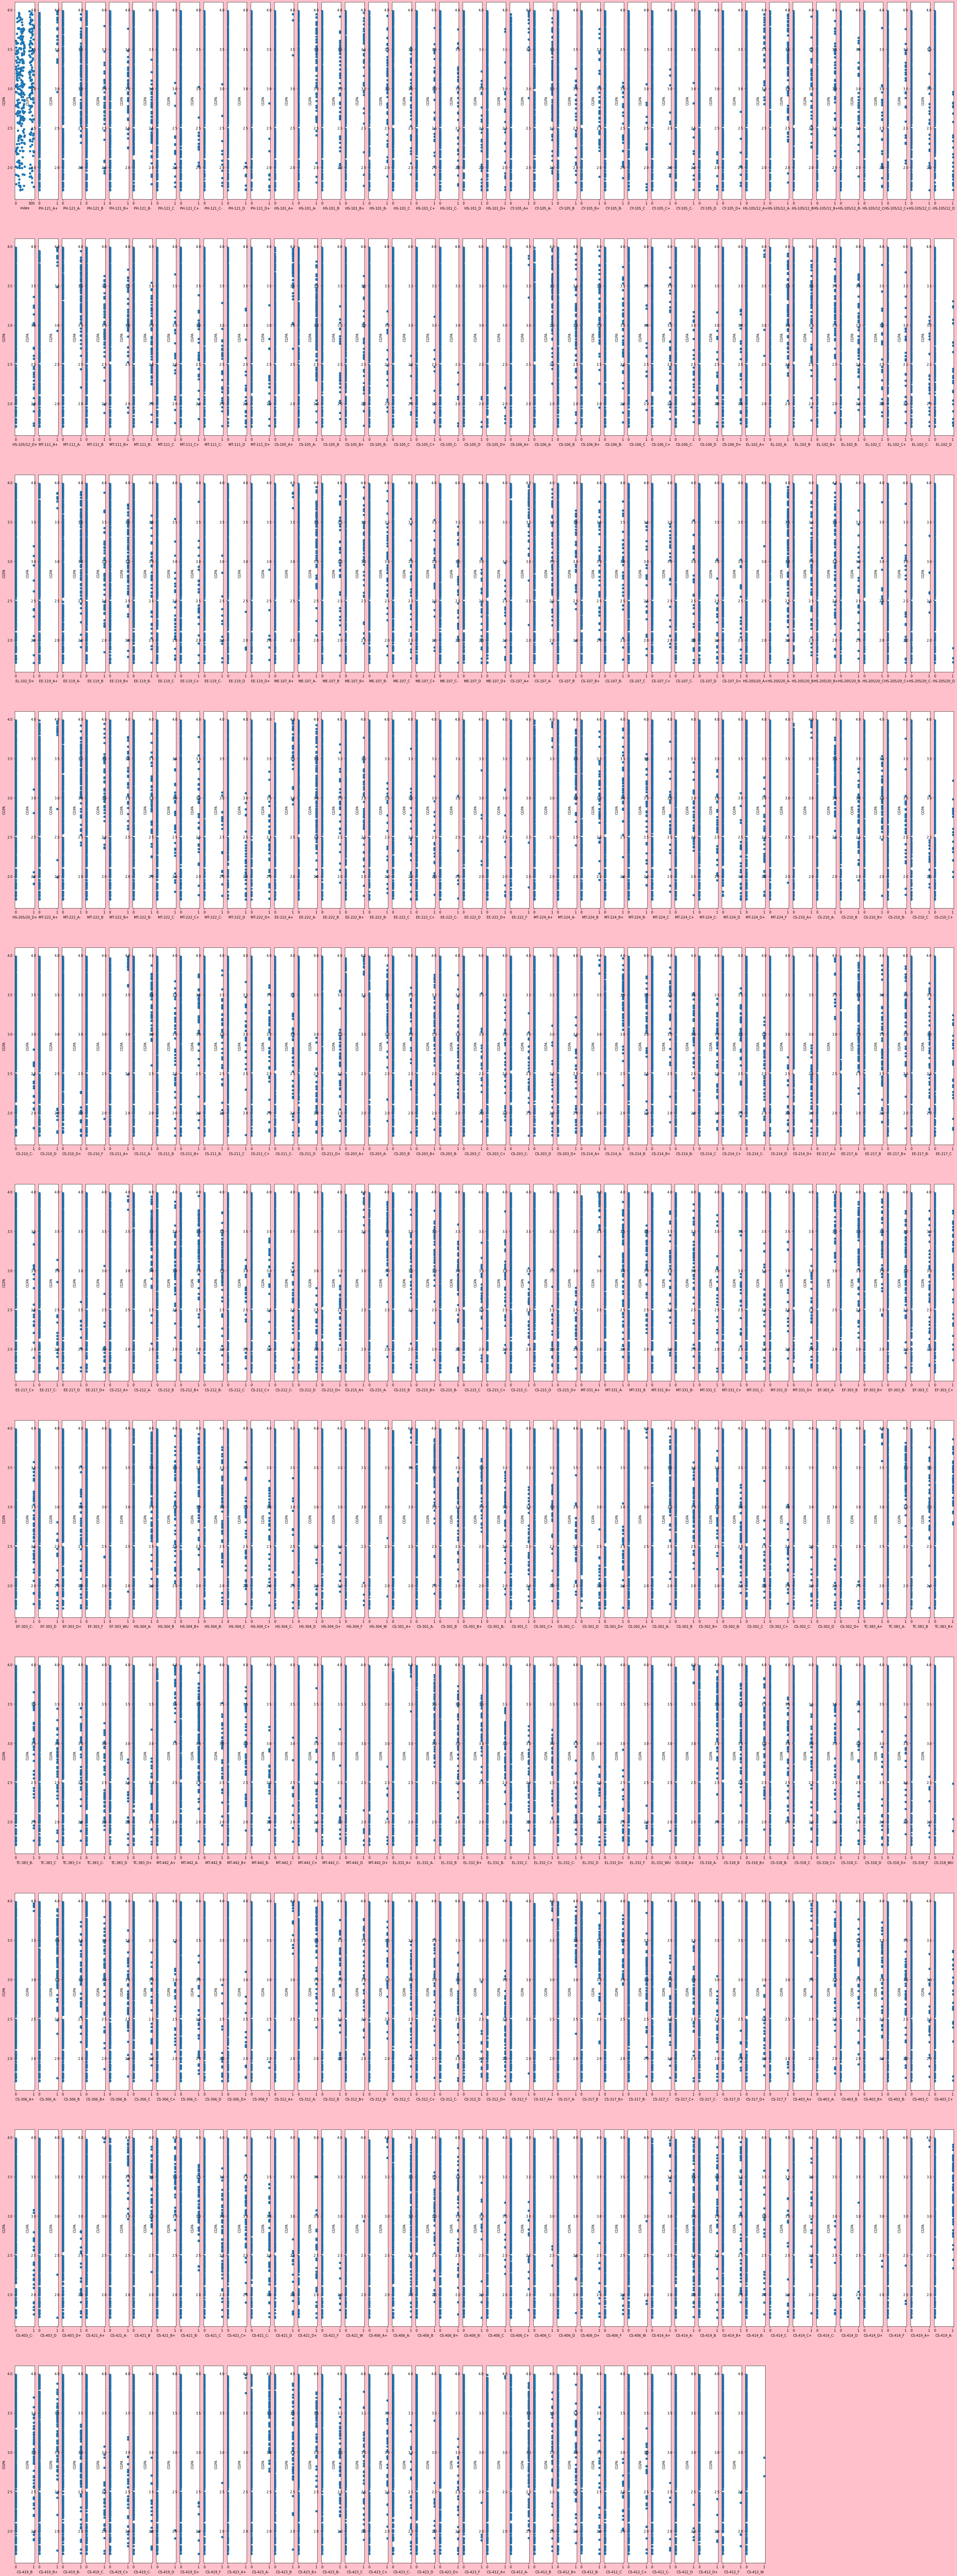

In [20]:
plt.figure(figsize=(50,140),facecolor='pink')
plotnumber=1

for column in x:
    if plotnumber <=432:
        ax=plt.subplot(11,40,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('CGPA',fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
## Therefore data is binary, no need to perfrom any scaling

In [ ]:
## lets begin the training and test our model

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=69)

In [22]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test,pred)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x,y,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test,pred))
        print('MSE = ',mean_squared_error(y_test,pred))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))

In [25]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 97.28%
Cross Validation Score =  0.9682019932280372
MAE =  0.08191486306822066
MSE =  0.009895622650178756
RMSE =  0.09947674426808889


In [ ]:
## We are getting 100% training and 97.2% testing result

In [ ]:
## Lets check with other model

In [26]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
xgb = XGBRegressor()

In [27]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [28]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.9727614648262313
0.1976789611795231
0.6428816052794588
0.8557690654314762
0.8803246921614433


In [ ]:
## XGB and Random Forest is also giving decent accuracies.
## Linear Regression is giving the best accuracy.
## Decision Tree giving poor accuracy and KNN is looks like horrible accuracy

In [ ]:
## Lets use Ridge Regularization for chekcing the overfitting the model

In [29]:
from sklearn.linear_model import Ridge, RidgeCV
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.1,0.001),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071,
       0.0081, 0.0091, 0.0101, 0.0111, 0.0121, 0.0131, 0.0141, 0.0151,
       0.0161, 0.0171, 0.0181, 0.0191, 0.0201, 0.0211, 0.0221, 0.0231,
       0.0241, 0.0251, 0.0261, 0.0271, 0.0281, 0.0291, 0.0301, 0.0311,
       0.0321, 0.0331, 0.0341, 0.0351, 0.0361, 0.0371, 0.0381, 0.0391,
       0.0401, 0.0411, 0.0421, 0.0431, 0.0441, 0.0451, 0.0461...
       0.0481, 0.0491, 0.0501, 0.0511, 0.0521, 0.0531, 0.0541, 0.0551,
       0.0561, 0.0571, 0.0581, 0.0591, 0.0601, 0.0611, 0.0621, 0.0631,
       0.0641, 0.0651, 0.0661, 0.0671, 0.0681, 0.0691, 0.0701, 0.0711,
       0.0721, 0.0731, 0.0741, 0.0751, 0.0761, 0.0771, 0.0781, 0.0791,
       0.0801, 0.0811, 0.0821, 0.0831, 0.0841, 0.0851, 0.0861, 0.0871,
       0.0881, 0.0891, 0.0901, 0.0911, 0.0921, 0.0931, 0.0941, 0.0951,
       0.0961, 0.0971, 0.0981, 0.0991]),
        normalize=True)

In [30]:
ridgecv.alpha_

0.0091

In [31]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.0091)

In [32]:
ridge_model.score(x_test,y_test)

0.9729357812802288

In [ ]:
## So the model is not overfitted, its similar to Linear regression.